### Rob Bjornson, YCRC

## Run Jupyter notebooks on the cloud using Mybinder.org

- Run Jupyter notebook from github repo
- repo is automatically dockerized and jupyterhub created to run it
- implemented using kubernetes on cloud resources
- can be used by multiple users (e.g. class)

## Example from Doug Duhaime's machine learning talk
https://github.com/YaleDHLab/lab-workshops/tree/master/machine-learning


Text(0,0.5,'occurrences of word love')

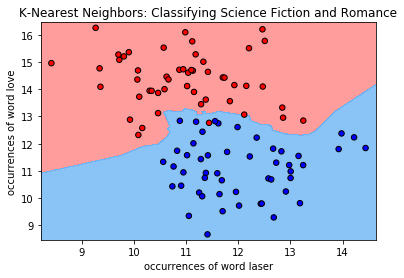

In [5]:
from sklearn.neighbors import KNeighborsClassifier
# import the make_blobs function from the sklearn module/package
from sklearn.datasets.samples_generator import make_blobs
# import code from matplotlib, a popular data visualization library
import matplotlib
import matplotlib.pyplot as plt

# import some custom helper code
import helpers

# use the function we imported to generate a matrix with 100 rows and 2 columns
# n_samples=100 specifies the number of rows in the returned matrix
# n_features=2 specifies the number of columns in the returned matrix
# centers=2 specifies the number of centroids, or attraction points, in the returned matrix
# random_state=0 makes the random data generator reproducible
# center_box=(0,20) specifies we want the centers in X to be between 0,20
X, labels = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0, center_box=(0,20))

# create and train a KNN model
clf = KNeighborsClassifier(3)
clf.fit(X, labels)

# use a helper function to plot the trained classifier's decision boundary
helpers.plot_decision_boundary(clf, X, labels)

# add a title and axis labels to the chart
plt.title('K-Nearest Neighbors: Classifying Science Fiction and Romance')
plt.xlabel('occurrences of word laser')
plt.ylabel('occurrences of word love')

# Anomaly Detection

[**Anomaly detection**](https://en.wikipedia.org/wiki/Anomaly_detection) refers to the identification of anomalies, or outliers, in datasets. While detecting anomalies in a single dimension can be quite simple, finding anomalies in high-dimensional datasets is a difficult problem.

One technique for classifying anomalies in high-dimensional datasets is an [**Isolation Forest**](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf). An Isolation Forest identifies outliers in a dataset by randomly dividing a space until each point is isolated from each other. After repeating this proceedure several times, the Isolation Forest identifies points that are quickly isolated from other points as outliers.

The illustration below attempts to illustrate the method by which these outliers are quickly identified. Isolated points are colored green and labelled with the iteration on which they were isolated. If you repeat the procedure several times, you'll see the outlier is consistently isolated quickly, which allows the Isolation Forest to identify that point as an outlier.

In [4]:
from IPython.display import IFrame
IFrame(src='https://s3.amazonaws.com/duhaime/blog/visualizations/isolation-forests.html', width=700, height=640)

If we run the simulation above a number of times, we should see the "outlier" point is consistently isolated quickly, while it usually takes more iterations to isolate the other points. This is the chief intuition behind the Isolation Forests outlier classification strategy&mdash;outliers are isolated quickly because they are farther from other points in the dataset.

Let's build a sample dataset and use Isolation Forests to classify the outliers in that dataset. 

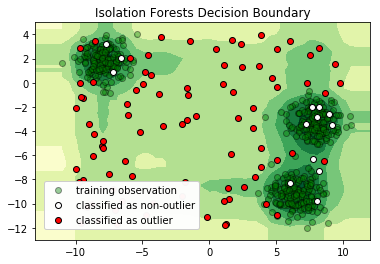

In [6]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets.samples_generator import make_blobs
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# seed a random number generator for consistent random values
rng = np.random.RandomState(1)

# generate 100 "training" data observations
n_training = 500
X, _ = make_blobs(random_state=6, n_samples=n_training)

# create the IsolationForest classifier
clf = IsolationForest(max_samples=500, random_state=1, n_jobs=-1)

# train the classifier on the training data
clf.fit(X)

# generate 100 new observations
new_vals = rng.uniform(low=(-10, -12), high=(10, 4), size=(100, 2))

# get classification results for the new observations; `result` contains
# one observation for each value in `new_vals`: a 1 means the point was
# in the training distribution, -1 means the point is an outlier
result = clf.predict(new_vals)

# plot the classification results
helpers.plot_iforest_decision_boundary(clf, X, new_vals, result)

In just a few lines of code, we can create, train, and deploy a machine learning model for detecting outliers in high-dimensional data!

# Dimension Reduction

So far we've seen data with observations in two dimensions (the scifi vs. romance books example) and observations in 50 dimensions (the word vector example). While each observation in the dataset above has only two components, some datasets are comprised of observations with hundreds or even thousands of components. These "high-dimensional" datasets can be quite hard to work with and reason about. High dimensional datasets also pose specific challenges to many machine learning models (see **[The Curse of Dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality)**). To work around these challenges, it's often helpful to reduce the number of dimensions required to express a given dataset.

One popular way to reduce the dimensionality of a dataset is to use a technique called [**Principal Component Analysis**](https://en.wikipedia.org/wiki/Principal_component_analysis). PCA tries to find a lower dimensional representation of a dataset by projecting that dataset down into a smaller dimensional space in a way that minimizes loss of information.

To get an intuition about PCA, suppose you have points in two dimensions, and you wish to reduce the dimensionality of your dataset to a single dimension. To do so, you could find the center of the points then create a line $L$ with a random orientation that passes through that center. One can then project each point onto $L$ such that an imaginary line between the point and $L$ form a right angle. Within this "projection", each 2D point can be represented with just its position along the 1D $L$, effectively giving us a 1D representation of the point's position in its original space. Furthermore, we can use the difference between the largest and smallest values of points projected onto $L$ as a measure of the amount of "variance" or "spread" within the data captured in $L$&mdash;the greater this spread, the greater the amount of "signal" from the original dataset is represented in the projection.

If one were to slowly rotate $L$ and continue measuring the delta between the greatest and smallest values on $L$ at each orientation, one could find the orientation of the projection line that minimizes information loss. (This line of minimal information loss is shown in pink below.) Once that line is discovered, we can actually project all of our points onto that lower-dimensional embedding (see the red points below when the black line is colinear with the pink line):

<img src='images/pca.gif'>